In [96]:
import cv2
import glob
import numpy
import pandas
import matplotlib.pyplot as plt

4.7.0
1.24.2
2.0.0


In [59]:
def set_resolution(cropped_images):
    res_set = []

    for idx, img in enumerate(cropped_images):
        if idx == 0:
            stan_img_shape = img.shape[:2]
            #print(stan_img_shape)
            res_set.append(img)
        else:
            if stan_img_shape == img.shape[:2]:
                #print("ok")
                res_set.append(img)
            else:
                sub_img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
                #print(sub_img.shape[:2])
                res_set.append(sub_img)

    return res_set

def show_img(img_list):
    for idx, img in enumerate(img_list):
        cv2.imshow(f"img_{idx}", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def show_img_mat(img_set):
    fig = plt.figure()
    idx = 1
    for i in range(len(img_set)):
        ax = fig.add_subplot(rows, cols, idx)
        ax.imshow(cv2.cvtColor(img_set[i], cv2.COLOR_BGR2RGB))
        ax.set_xticks([])
        ax.set_yticks([])
        idx +=1

In [48]:
image_path = "image/crooped_images/*.jpg"
# mat -> [col, row]
cols, rows = 3, 4

In [85]:
cropped_images  = [cv2.imread(f) for f in glob.glob(image_path)]

# Gray Scale 변환
processed_images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in cropped_images]

# Gaussian Blur
processed_images = [cv2.GaussianBlur(img, (0,0), 1) for img in processed_images]

# 90 degree solved
res_images = set_resolution(processed_images)

# resolutions = [i.shape[:2] for i in res_images]

# 2. image merge(using stitching)
canny_images = [cv2.Canny(img, 60,200) for img in res_images]



In [86]:
print(len(cropped_images))
print(len(processed_images))
print(len(res_images))
print(len(canny_images))

4
4
4
4


In [55]:
show_img([cropped_images[0], processed_images[0], res_images[0], canny_images[0]])

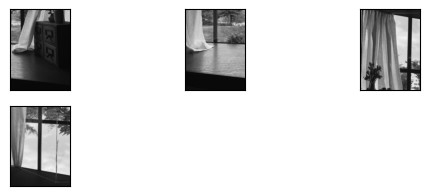

In [87]:
show_img_mat(res_images)

### Smaple Test

In [61]:
# hconcat sample
v_img = cv2.hconcat([res_images[0], res_images[1]])
v_canny_img = cv2.Canny(v_img, 60, 200)
v_c_img = cv2.hconcat([canny_images[0], canny_images[1]])
diff_img = v_canny_img - v_c_img
edge_sum = numpy.sum(diff_img)
print(edge_sum)
s_img = cv2.vconcat([v_img, v_canny_img, v_c_img, diff_img])
show_img([v_img, v_canny_img, v_c_img, diff_img])

85692


In [62]:
# vconcat sample
v_img = cv2.vconcat([res_images[0], res_images[1]])
v_canny_img = cv2.Canny(v_img, 60, 200)
v_c_img = cv2.vconcat([canny_images[0], canny_images[1]])
diff_img = v_canny_img - v_c_img
edge_sum = numpy.sum(diff_img)
print(edge_sum)
s_img = cv2.hconcat([v_img, v_canny_img, v_c_img, diff_img])
show_img([v_img, v_canny_img, v_c_img, diff_img])

174714


In [63]:
# Answer
v_img = cv2.hconcat([res_images[1], res_images[0]])
v_canny_img = cv2.Canny(v_img, 60, 200)
v_c_img = cv2.hconcat([canny_images[1], canny_images[0]])
diff_img = v_canny_img - v_c_img
edge_sum = numpy.sum(diff_img)
print(edge_sum)
s_img = cv2.vconcat([v_img, v_canny_img, v_c_img, diff_img])
show_img([v_img, v_canny_img, v_c_img, diff_img])

30367


### Create Logic

In [68]:
# 1. hconcat

# 1.1 None Type
v_img = cv2.hconcat([res_images[0], res_images[1]])
v_canny_img = cv2.Canny(v_img, 60, 200)
v_c_img = cv2.hconcat([canny_images[0], canny_images[1]])
diff_img = v_canny_img - v_c_img
edge_sum = numpy.sum(diff_img)
print(f"Order Number {1}, Matching Order {2}, Merge Type {'Horizontal'} Transformation {'none'} , EdgeSum {edge_sum}")
show_img([v_img, v_canny_img, v_c_img, diff_img])
# 1.2 mirroring check
v_img = cv2.hconcat([res_images[0], cv2.flip(res_images[1],1)])
v_canny_img = cv2.Canny(v_img, 60, 200)
v_c_img = cv2.hconcat([canny_images[0], cv2.flip(canny_images[1],1)])
diff_img = v_canny_img - v_c_img
edge_sum = numpy.sum(diff_img)
print(f"Order Number {1}, Matching Order {2}, Merge Type {'Horizontal'} Transformation {'Mirroring'} , EdgeSum {edge_sum}")
show_img([v_img, v_canny_img, v_c_img, diff_img])
# 1.3 flipping check
v_img = cv2.hconcat([res_images[0], cv2.flip(res_images[1],0)])
v_canny_img = cv2.Canny(v_img, 60, 200)
v_c_img = cv2.hconcat([canny_images[0], cv2.flip(canny_images[1],0)])
diff_img = v_canny_img - v_c_img
edge_sum = numpy.sum(diff_img)
print(f"Order Number {1}, Matching Order {2}, Merge Type {'Horizontal'} Transformation {'flipping'} , EdgeSum {edge_sum}")
show_img([v_img, v_canny_img, v_c_img, diff_img])
# 1.4 mirroring & flipping check
v_img = cv2.hconcat([res_images[0], cv2.flip(cv2.flip(res_images[1],1),0)])
v_canny_img = cv2.Canny(v_img, 60, 200)
v_c_img = cv2.hconcat([canny_images[0], cv2.flip(cv2.flip(canny_images[1],1),0)])
diff_img = v_canny_img - v_c_img
edge_sum = numpy.sum(diff_img)
print(f"Order Number {1}, Matching Order {2}, Merge Type {'Horizontal'} Transformation {'Mirroring & flipping'} , EdgeSum {edge_sum}")
show_img([v_img, v_canny_img, v_c_img, diff_img])
# 2. vconcat

# 2.1 None Type
v_img = cv2.vconcat([res_images[0], res_images[1]])
v_canny_img = cv2.Canny(v_img, 60, 200)
v_c_img = cv2.vconcat([canny_images[0], canny_images[1]])
diff_img = v_canny_img - v_c_img
edge_sum = numpy.sum(diff_img)
print(f"Order Number {1}, Matching Order {2}, Merge Type {'Vertical'} Transformation {'none'} , EdgeSum {edge_sum}")
show_img([v_img, v_canny_img, v_c_img, diff_img])
# 2.2 mirroring check
v_img = cv2.vconcat([res_images[0], cv2.flip(res_images[1],1)])
v_canny_img = cv2.Canny(v_img, 60, 200)
v_c_img = cv2.vconcat([canny_images[0], cv2.flip(canny_images[1],1)])
diff_img = v_canny_img - v_c_img
edge_sum = numpy.sum(diff_img)
print(f"Order Number {1}, Matching Order {2}, Merge Type {'Vertical'} Transformation {'Mirroring'} , EdgeSum {edge_sum}")
show_img([v_img, v_canny_img, v_c_img, diff_img])
# 2.3 flipping check
v_img = cv2.vconcat([res_images[0], cv2.flip(res_images[1],0)])
v_canny_img = cv2.Canny(v_img, 60, 200)
v_c_img = cv2.vconcat([canny_images[0], cv2.flip(canny_images[1],0)])
diff_img = v_canny_img - v_c_img
edge_sum = numpy.sum(diff_img)
print(f"Order Number {1}, Matching Order {2}, Merge Type {'Vertical'} Transformation {'flipping'} , EdgeSum {edge_sum}")
show_img([v_img, v_canny_img, v_c_img, diff_img])
# 2.4 mirroring & flipping check
v_img = cv2.vconcat([res_images[0], cv2.flip(cv2.flip(res_images[1],1),0)])
v_canny_img = cv2.Canny(v_img, 60, 200)
v_c_img = cv2.vconcat([canny_images[0], cv2.flip(cv2.flip(canny_images[1],1),0)])
diff_img = v_canny_img - v_c_img
edge_sum = numpy.sum(diff_img)
print(f"Order Number {1}, Matching Order {2}, Merge Type {'Vertical'} Transformation {'Mirroring & flipping'} , EdgeSum {edge_sum}")
show_img([v_img, v_canny_img, v_c_img, diff_img])

Order Number 1, Matching Order 2, Merge Type Horizontal Transformation none , EdgeSum 85692
Order Number 1, Matching Order 2, Merge Type Horizontal Transformation Mirroring , EdgeSum 185720
Order Number 1, Matching Order 2, Merge Type Horizontal Transformation flipping , EdgeSum 158485
Order Number 1, Matching Order 2, Merge Type Horizontal Transformation Mirroring & flipping , EdgeSum 245501
Order Number 1, Matching Order 2, Merge Type Vertical Transformation none , EdgeSum 174714
Order Number 1, Matching Order 2, Merge Type Vertical Transformation Mirroring , EdgeSum 184465
Order Number 1, Matching Order 2, Merge Type Vertical Transformation flipping , EdgeSum 30717
Order Number 1, Matching Order 2, Merge Type Vertical Transformation Mirroring & flipping , EdgeSum 40711


In [ ]:
# list check test
list_A = [1,2,3,4,5,6,7,8,9]

for i in range(len(list_A)):
    list_B = list_A.copy()
    list_B.pop(i)
    for j in list_B:
        print(i == j)

In [90]:
ord_number = [i+1 for i in range(len(cropped_images))]
print(ord_number)

[1, 2, 3, 4]


In [179]:
# 사용되는 리스트는 res_images, canny_images
ord_number = [i+1 for i in range(len(cropped_images))]
result_dict = []
for i in range(len(res_images)):
    check_res = res_images.copy()
    check_canny = canny_images.copy()
    check_ord_n = ord_number.copy()
    check_res.pop(i)
    check_canny.pop(i)
    check_ord_n.pop(i)
    for res, canny, num in zip(check_res, check_canny, check_ord_n):
        # 1. hconcat

        # 1.1 orderType None
        # 1.1.1 matchingType None
        v_img = cv2.hconcat([res_images[i], res])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.hconcat([canny_images[i], canny])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[:, int(w/2-30):int(w/2+30)])
        print(f"Order Number {i+1}, orderType: {'none'}Matching Order {num}, Merge Type {'Horizontal'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "none", "matchingNumber": num, "matchingType":'Horizontal', "transformation":'none',"edgeSum" :edge_sum})

        # 1.1.2 matchingType mirroring
        v_img = cv2.hconcat([res_images[i], cv2.flip(res,1)])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.hconcat([canny_images[i], cv2.flip(canny,1)])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[:, int(w/2-30):int(w/2+30)])
        print(f"Order Number {i+1}, orderType: {'none'}Matching Order {num}, Merge Type {'Horizontal'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "none", "matchingNumber": num, "matchingType":'Horizontal', "transformation":'mirroring', "edgeSum" :edge_sum})

        # 1.1.3 matchingType flipping
        v_img = cv2.hconcat([res_images[i], cv2.flip(res,0)])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.hconcat([canny_images[i], cv2.flip(canny,0)])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[:, int(w/2-30):int(w/2+30)])
        print(f"Order Number {i+1}, orderType: {'none'}Matching Order {num}, Merge Type {'Horizontal'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "none", "matchingNumber": num, "matchingType":'Horizontal', "transformation":'flipping',"edgeSum" :edge_sum})

        # 1.1.4 matchingType mirroring & flipping
        v_img = cv2.hconcat([res_images[i], cv2.flip(cv2.flip(res,1),0)])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.hconcat([canny_images[i], cv2.flip(cv2.flip(canny,1),0)])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[:, int(w/2-30):int(w/2+30)])
        print(f"Order Number {i+1}, orderType: {'none'}Matching Order {num}, Merge Type {'Horizontal'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "none", "matchingNumber": num, "matchingType":'Horizontal', "transformation":'mirroring&flipping',"edgeSum" :edge_sum})

        # 1.2 orderType Mirroring
        # 1.2.1 matchingType None
        v_img = cv2.hconcat([cv2.flip(res_images[i],1), res])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.hconcat([cv2.flip(canny_images[i],1), canny])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[:, int(w/2-30):int(w/2+30)])
        print(f"Order Number {i+1}, orderType: {'mirroring'}Matching Order {num}, Merge Type {'Horizontal'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "mirroring", "matchingNumber": num, "matchingType":'Horizontal', "transformation":'none',"edgeSum" :edge_sum})

        # 1.2.2 matchingType mirroring
        v_img = cv2.hconcat([cv2.flip(res_images[i],1), cv2.flip(res,1)])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.hconcat([cv2.flip(canny_images[i],1), cv2.flip(canny,1)])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[:, int(w/2-30):int(w/2+30)])
        print(f"Order Number {i+1}, orderType: {'mirroring'}Matching Order {num}, Merge Type {'Horizontal'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "mirroring", "matchingNumber": num, "matchingType":'Horizontal', "transformation":'mirroring', "edgeSum" :edge_sum})

        # 1.2.3 matchingType flipping
        v_img = cv2.hconcat([cv2.flip(res_images[i],1), cv2.flip(res,0)])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.hconcat([cv2.flip(canny_images[i],1), cv2.flip(canny,0)])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[:, int(w/2-30):int(w/2+30)])
        print(f"Order Number {i+1}, orderType: {'mirroring'}Matching Order {num}, Merge Type {'Horizontal'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "mirroring", "matchingNumber": num, "matchingType":'Horizontal', "transformation":'flipping',"edgeSum" :edge_sum})

        # 1.2.4 matchingType mirroring & flipping
        v_img = cv2.hconcat([cv2.flip(res_images[i],1), cv2.flip(cv2.flip(res,1),0)])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.hconcat([cv2.flip(canny_images[i],1), cv2.flip(cv2.flip(canny,1),0)])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[:, int(w/2-30):int(w/2+30)])
        print(f"Order Number {i+1}, orderType: {'mirroring'}Matching Order {num}, Merge Type {'Horizontal'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "mirroring", "matchingNumber": num, "matchingType":'Horizontal', "transformation":'mirroring&flipping',"edgeSum" :edge_sum})

        # 1.3 orderType Flipping
        # 1.3.1 matchingType None
        v_img = cv2.hconcat([cv2.flip(res_images[i],0), res])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.hconcat([cv2.flip(canny_images[i],0), canny])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[:, int(w/2-30):int(w/2+30)])
        print(f"Order Number {i+1}, orderType: {'flipping'}Matching Order {num}, Merge Type {'Horizontal'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "flipping", "matchingNumber": num, "matchingType":'Horizontal', "transformation":'none',"edgeSum" :edge_sum})

        # 1.3.2 matchingType mirroring
        v_img = cv2.hconcat([cv2.flip(res_images[i],0), cv2.flip(res,1)])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.hconcat([cv2.flip(canny_images[i],0), cv2.flip(canny,1)])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[:, int(w/2-30):int(w/2+30)])
        print(f"Order Number {i+1}, orderType: {'flipping'}Matching Order {num}, Merge Type {'Horizontal'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "flipping", "matchingNumber": num, "matchingType":'Horizontal', "transformation":'mirroring', "edgeSum" :edge_sum})

        # 1.3.3 matchingType flipping
        v_img = cv2.hconcat([cv2.flip(res_images[i],0), cv2.flip(res,0)])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.hconcat([cv2.flip(canny_images[i],0), cv2.flip(canny,0)])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[:, int(w/2-30):int(w/2+30)])
        print(f"Order Number {i+1}, orderType: {'flipping'}Matching Order {num}, Merge Type {'Horizontal'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "flipping", "matchingNumber": num, "matchingType":'Horizontal', "transformation":'flipping',"edgeSum" :edge_sum})

        # 1.3.4 matchingType mirroring & flipping
        v_img = cv2.hconcat([cv2.flip(res_images[i],0), cv2.flip(cv2.flip(res,1),0)])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.hconcat([cv2.flip(canny_images[i],0), cv2.flip(cv2.flip(canny,1),0)])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[:, int(w/2-30):int(w/2+30)])
        print(f"Order Number {i+1}, orderType: {'flipping'}Matching Order {num}, Merge Type {'Horizontal'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "flipping", "matchingNumber": num, "matchingType":'Horizontal', "transformation":'mirroring&flipping',"edgeSum" :edge_sum})

        # 1.4 orderType Mirroring & Flipping
        # 1.4.1 matchingType None
        v_img = cv2.hconcat([cv2.flip(cv2.flip(res_images[i],1),0), res])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.hconcat([cv2.flip(cv2.flip(canny_images[i],1),0), canny])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[:, int(w/2-30):int(w/2+30)])
        print(f"Order Number {i+1}, orderType: {'mirroring&flipping'}Matching Order {num}, Merge Type {'Horizontal'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "mirroring&flipping", "matchingNumber": num, "matchingType":'Horizontal', "transformation":'none',"edgeSum" :edge_sum})

        # 1.4.2 matchingType mirroring
        v_img = cv2.hconcat([cv2.flip(cv2.flip(res_images[i],1),0), cv2.flip(res,1)])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.hconcat([cv2.flip(cv2.flip(canny_images[i],1),0), cv2.flip(canny,1)])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[:, int(w/2-30):int(w/2+30)])
        print(f"Order Number {i+1}, orderType: {'mirroring&flipping'}Matching Order {num}, Merge Type {'Horizontal'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "mirroring&flipping", "matchingNumber": num, "matchingType":'Horizontal', "transformation":'mirroring', "edgeSum" :edge_sum})

        # 1.4.3 matchingType flipping
        v_img = cv2.hconcat([cv2.flip(cv2.flip(res_images[i],1),0), cv2.flip(res,0)])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.hconcat([cv2.flip(cv2.flip(canny_images[i],1),0), cv2.flip(canny,0)])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[:, int(w/2-30):int(w/2+30)])
        print(f"Order Number {i+1}, orderType: {'mirroring&flipping'}Matching Order {num}, Merge Type {'Horizontal'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "mirroring&flipping", "matchingNumber": num, "matchingType":'Horizontal', "transformation":'flipping',"edgeSum" :edge_sum})

        # 1.4.4 matchingType mirroring & flipping
        v_img = cv2.hconcat([cv2.flip(cv2.flip(res_images[i],1),0), cv2.flip(cv2.flip(res,1),0)])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.hconcat([cv2.flip(cv2.flip(canny_images[i],1),0), cv2.flip(cv2.flip(canny,1),0)])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[:, int(w/2-30):int(w/2+30)])
        print(f"Order Number {i+1}, orderType: {'mirroring&flipping'}Matching Order {num}, Merge Type {'Horizontal'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "mirroring&flipping", "matchingNumber": num, "matchingType":'Horizontal', "transformation":'mirroring&flipping',"edgeSum" :edge_sum})




        # 2. vertical

        # 2.1 orderType None
        # 2.1.1 matchingType None
        v_img = cv2.vconcat([res_images[i], res])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.vconcat([canny_images[i], canny])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[ int(h/2-30):int(h/2+30), : ])
        print(f"Order Number {i+1}, orderType: {'none'}, Matching Order {num}, Merge Type {'vertical'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "none", "matchingNumber": num, "matchingType":'vertical', "transformation":'none',"edgeSum" :edge_sum})

        # 2.1.2 matchingType mirroring
        v_img = cv2.vconcat([res_images[i], cv2.flip(res,1)])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.vconcat([canny_images[i], cv2.flip(canny,1)])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[ int(h/2-30):int(h/2+30), : ])
        print(f"Order Number {i+1}, orderType: {'none'}Matching Order {num}, Merge Type {'vertical'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "none", "matchingNumber": num, "matchingType":'vertical', "transformation":'mirroring', "edgeSum" :edge_sum})

        # 2.1.3 matchingType flipping
        v_img = cv2.vconcat([res_images[i], cv2.flip(res,0)])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.vconcat([canny_images[i], cv2.flip(canny,0)])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[ int(h/2-30):int(h/2+30), : ])
        print(f"Order Number {i+1}, orderType: {'none'}Matching Order {num}, Merge Type {'vertical'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "none", "matchingNumber": num, "matchingType":'vertical', "transformation":'flipping',"edgeSum" :edge_sum})

        # 2.1.4 matchingType mirroring & flipping
        v_img = cv2.vconcat([res_images[i], cv2.flip(cv2.flip(res,1),0)])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.vconcat([canny_images[i], cv2.flip(cv2.flip(canny,1),0)])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[ int(h/2-30):int(h/2+30), : ])
        print(f"Order Number {i+1}, orderType: {'none'}Matching Order {num}, Merge Type {'vertical'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "none", "matchingNumber": num, "matchingType":'vertical', "transformation":'mirroring&flipping',"edgeSum" :edge_sum})

        # 2.2 orderType Mirroring
        # 2.2.1 matchingType None
        v_img = cv2.vconcat([cv2.flip(res_images[i],1), res])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.vconcat([cv2.flip(canny_images[i],1), canny])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[ int(h/2-30):int(h/2+30), : ])
        print(f"Order Number {i+1}, orderType: {'mirroring'}Matching Order {num}, Merge Type {'vertical'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "mirroring", "matchingNumber": num, "matchingType":'vertical', "transformation":'none',"edgeSum" :edge_sum})

        # 2.2.2 matchingType mirroring
        v_img = cv2.vconcat([cv2.flip(res_images[i],1), cv2.flip(res,1)])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.vconcat([cv2.flip(canny_images[i],1), cv2.flip(canny,1)])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[ int(h/2-30):int(h/2+30), : ])
        print(f"Order Number {i+1}, orderType: {'mirroring'}Matching Order {num}, Merge Type {'vertical'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "mirroring", "matchingNumber": num, "matchingType":'vertical', "transformation":'mirroring', "edgeSum" :edge_sum})

        # 2.2.3 matchingType flipping
        v_img = cv2.vconcat([cv2.flip(res_images[i],1), cv2.flip(res,0)])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.vconcat([cv2.flip(canny_images[i],1), cv2.flip(canny,0)])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[ int(h/2-30):int(h/2+30), : ])
        print(f"Order Number {i+1}, orderType: {'mirroring'}Matching Order {num}, Merge Type {'vertical'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "mirroring", "matchingNumber": num, "matchingType":'vertical', "transformation":'flipping',"edgeSum" :edge_sum})

        # 2.2.4 matchingType mirroring & flipping
        v_img = cv2.vconcat([cv2.flip(res_images[i],1), cv2.flip(cv2.flip(res,1),0)])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.vconcat([cv2.flip(canny_images[i],1), cv2.flip(cv2.flip(canny,1),0)])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[ int(h/2-30):int(h/2+30), : ])
        print(f"Order Number {i+1}, orderType: {'mirroring'}Matching Order {num}, Merge Type {'vertical'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "mirroring", "matchingNumber": num, "matchingType":'vertical', "transformation":'mirroring&flipping',"edgeSum" :edge_sum})

        # 2.3 orderType Flipping
        # 2.3.1 matchingType None
        v_img = cv2.vconcat([cv2.flip(res_images[i],0), res])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.vconcat([cv2.flip(canny_images[i],0), canny])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[ int(h/2-30):int(h/2+30), : ])
        print(f"Order Number {i+1}, orderType: {'flipping'}Matching Order {num}, Merge Type {'vertical'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "flipping", "matchingNumber": num, "matchingType":'vertical', "transformation":'none',"edgeSum" :edge_sum})

        # 2.3.2 matchingType mirroring
        v_img = cv2.vconcat([cv2.flip(res_images[i],0), cv2.flip(res,1)])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.vconcat([cv2.flip(canny_images[i],0), cv2.flip(canny,1)])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[:, int(w/2-30):int(w/2+30)])
        print(f"Order Number {i+1}, orderType: {'flipping'}Matching Order {num}, Merge Type {'vertical'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "flipping", "matchingNumber": num, "matchingType":'vertical', "transformation":'mirroring', "edgeSum" :edge_sum})

        # 2.3.3 matchingType flipping
        v_img = cv2.vconcat([cv2.flip(res_images[i],0), cv2.flip(res,0)])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.vconcat([cv2.flip(canny_images[i],0), cv2.flip(canny,0)])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[ int(h/2-30):int(h/2+30), : ])
        print(f"Order Number {i+1}, orderType: {'flipping'}Matching Order {num}, Merge Type {'vertical'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "flipping", "matchingNumber": num, "matchingType":'vertical', "transformation":'flipping',"edgeSum" :edge_sum})

        # 2.3.4 matchingType mirroring & flipping
        v_img = cv2.vconcat([cv2.flip(res_images[i],0), cv2.flip(cv2.flip(res,1),0)])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.vconcat([cv2.flip(canny_images[i],0), cv2.flip(cv2.flip(canny,1),0)])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[ int(h/2-30):int(h/2+30), : ])
        print(f"Order Number {i+1}, orderType: {'flipping'}Matching Order {num}, Merge Type {'vertical'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "flipping", "matchingNumber": num, "matchingType":'vertical', "transformation":'mirroring&flipping',"edgeSum" :edge_sum})

        # 2.4 orderType Mirroring & Flipping
        # 2.4.1 matchingType None
        v_img = cv2.vconcat([cv2.flip(cv2.flip(res_images[i],1),0), res])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.vconcat([cv2.flip(cv2.flip(canny_images[i],1),0), canny])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[ int(h/2-30):int(h/2+30), : ])
        print(f"Order Number {i+1}, orderType: {'mirroring&flipping'}Matching Order {num}, Merge Type {'vertical'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "mirroring&flipping", "matchingNumber": num, "matchingType":'vertical', "transformation":'none',"edgeSum" :edge_sum})

        # 2.4.2 matchingType mirroring
        v_img = cv2.vconcat([cv2.flip(cv2.flip(res_images[i],1),0), cv2.flip(res,1)])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.vconcat([cv2.flip(cv2.flip(canny_images[i],1),0), cv2.flip(canny,1)])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[ int(h/2-30):int(h/2+30), : ])
        print(f"Order Number {i+1}, orderType: {'mirroring&flipping'}Matching Order {num}, Merge Type {'vertical'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "mirroring&flipping", "matchingNumber": num, "matchingType":'vertical', "transformation":'mirroring', "edgeSum" :edge_sum})

        # 2.4.3 matchingType flipping
        v_img = cv2.vconcat([cv2.flip(cv2.flip(res_images[i],1),0), cv2.flip(res,0)])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.vconcat([cv2.flip(cv2.flip(canny_images[i],1),0), cv2.flip(canny,0)])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[ int(h/2-30):int(h/2+30), : ])
        print(f"Order Number {i+1}, orderType: {'mirroring&flipping'}Matching Order {num}, Merge Type {'vertical'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "mirroring&flipping", "matchingNumber": num, "matchingType":'vertical', "transformation":'flipping',"edgeSum" :edge_sum})

        # 2.4.4 matchingType mirroring & flipping
        v_img = cv2.vconcat([cv2.flip(cv2.flip(res_images[i],1),0), cv2.flip(cv2.flip(res,1),0)])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.vconcat([cv2.flip(cv2.flip(canny_images[i],1),0), cv2.flip(cv2.flip(canny,1),0)])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[ int(h/2-30):int(h/2+30), : ])
        print(f"Order Number {i+1}, orderType: {'mirroring&flipping'}Matching Order {num}, Merge Type {'vertical'}, Transformation {'none'} , EdgeSum {edge_sum}")
        result_dict.append({"orderNumber": i+1,"orderType": "mirroring&flipping", "matchingNumber": num, "matchingType":'vertical', "transformation":'mirroring&flipping',"edgeSum" :edge_sum})


Order Number 1, orderType: noneMatching Order 2, Merge Type Horizontal, Transformation none , EdgeSum 85692
Order Number 1, orderType: noneMatching Order 2, Merge Type Horizontal, Transformation none , EdgeSum 170876
Order Number 1, orderType: noneMatching Order 2, Merge Type Horizontal, Transformation none , EdgeSum 128024
Order Number 1, orderType: noneMatching Order 2, Merge Type Horizontal, Transformation none , EdgeSum 202518
Order Number 1, orderType: mirroringMatching Order 2, Merge Type Horizontal, Transformation none , EdgeSum 166533
Order Number 1, orderType: mirroringMatching Order 2, Merge Type Horizontal, Transformation none , EdgeSum 36753
Order Number 1, orderType: mirroringMatching Order 2, Merge Type Horizontal, Transformation none , EdgeSum 141810
Order Number 1, orderType: mirroringMatching Order 2, Merge Type Horizontal, Transformation none , EdgeSum 235681
Order Number 1, orderType: flippingMatching Order 2, Merge Type Horizontal, Transformation none , EdgeSum 1277

In [180]:
res_df = pandas.DataFrame(result_dict)
res_df

,orderNumber,orderType,matchingNumber,matchingType,transformation,edgeSum
0,1,none,2,Horizontal,none,85692
1,1,none,2,Horizontal,mirroring,170876
2,1,none,2,Horizontal,flipping,128024
3,1,none,2,Horizontal,mirroring&flipping,202518
4,1,mirroring,2,Horizontal,none,166533
...,...,...,...,...,...,...
379,4,flipping,3,vertical,mirroring&flipping,100007
380,4,mirroring&flipping,3,vertical,none,108660
381,4,mirroring&flipping,3,vertical,mirroring,114272
382,4,mirroring&flipping,3,vertical,flipping,98727


In [128]:
# Answer
v_img = cv2.vconcat([res_images[1], cv2.flip(res_images[0],0)])
v_canny_img = cv2.Canny(v_img, 60, 200)
v_c_img = cv2.vconcat([canny_images[1], cv2.flip(canny_images[0],0)])
diff_img = v_canny_img - v_c_img
edge_sum = numpy.sum(diff_img)
h,w = v_img.shape[:2]
numpy.sum(diff_img[w-30:w+30])

print(edge_sum)
s_img_1 = cv2.vconcat([v_img, v_canny_img, v_c_img, diff_img])
show_img([v_img, v_canny_img, v_c_img, diff_img])

10221


In [177]:
v_img = cv2.vconcat([res_images[1], cv2.flip(cv2.flip(res_images[3],0),1)])
v_canny_img = cv2.Canny(v_img, 60, 200)
v_c_img = cv2.vconcat([canny_images[1], cv2.flip(cv2.flip(canny_images[3],0),1)])
diff_img = v_canny_img - v_c_img
h,w = v_img.shape[:2]
edge_sum = numpy.sum(diff_img[ int(h/2-30):int(h/2+30), :])
print(f"Order Number {i+1}, Matching Order {num}, Merge Type {'Vertical'}, Transformation {'Mirroring'} , EdgeSum {edge_sum}")
show_img([v_img, v_canny_img, v_c_img, diff_img])

Order Number 4, Matching Order 3, Merge Type Vertical, Transformation Mirroring , EdgeSum 0


In [178]:
v_img = cv2.vconcat([res_images[2], res_images[0]])
v_canny_img = cv2.Canny(v_img, 60, 200)
v_c_img = cv2.vconcat([canny_images[2], canny_images[0]])
diff_img = v_canny_img - v_c_img
h,w = v_img.shape[:2]
edge_sum = numpy.sum(diff_img[ int(h/2-30):int(h/2+30), :])
print(f"Order Number {i+1}, Matching Order {num}, Merge Type {'Vertical'}, Transformation {'Mirroring'} , EdgeSum {edge_sum}")
show_img([v_img, v_canny_img, v_c_img, diff_img])

Order Number 4, Matching Order 3, Merge Type Vertical, Transformation Mirroring , EdgeSum 130853


In [181]:
def answer_check(ord_num, match_num, order_type, match_type, transformation):

    if order_type == "mirroring":
        ord_image =  cv2.flip(res_images[ord_num],1)
        canny_image = cv2.flip(canny_images[ord_num],1)
    elif order_type == "flipping":
        ord_image =  cv2.flip(res_images[ord_num],0)
        canny_image = cv2.flip(canny_images[ord_num],0)
    elif order_type == "mirroring&flipping":
        ord_image =  cv2.flip(cv2.flip(res_images[ord_num],1),0)
        canny_image = cv2.flip(cv2.flip(canny_images[ord_num],1),0)
    else:
        ord_image = res_images[ord_num]
        canny_image = canny_images[ord_num]

    if transformation == "mirroring":
        match_image =  cv2.flip(res_images[match_num],1)
        match_canny_image = cv2.flip(canny_images[match_num],1)
    elif transformation == "flipping":
        match_image =  cv2.flip(res_images[match_num],0)
        match_canny_image = cv2.flip(canny_images[match_num],1)
    elif transformation == "mirroring&flipping":
        match_image =  cv2.flip(cv2.flip(res_images[match_num],1),0)
        match_canny_image =  cv2.flip(cv2.flip(canny_images[match_num],1),0)
    else:
        match_image = res_images[match_num]
        match_canny_image = canny_images[match_num]

    if match_type == "vertical":
        v_img = cv2.vconcat([ord_image, match_image])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.vconcat([canny_image, match_canny_image])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[ int(h/2-30):int(h/2+30), :])
        print(f"Order Number {i+1}, Matching Order {num}, Merge Type {'Vertical'}, Transformation {'Mirroring'} , EdgeSum {edge_sum}")
        show_img([v_img, v_canny_img, v_c_img, diff_img])
    elif match_type == "Horizontal":
        v_img = cv2.hconcat([ord_image, match_image])
        v_canny_img = cv2.Canny(v_img, 60, 200)
        v_c_img = cv2.hconcat([canny_image, match_canny_image])
        diff_img = v_canny_img - v_c_img
        h,w = v_img.shape[:2]
        edge_sum = numpy.sum(diff_img[:, int(w/2-30):int(w/2+30)])
        print(f"Order Number {i+1}, Matching Order {num}, Merge Type {'Vertical'}, Transformation {'Mirroring'} , EdgeSum {edge_sum}")
        show_img([v_img, v_canny_img, v_c_img, diff_img])
    else:
        print("Bad Access")



In [190]:
## Answer Test
answer_check(2,0,"flipping", "vertical", "mirroring")

Order Number 4, Matching Order 3, Merge Type Vertical, Transformation Mirroring , EdgeSum 91080


In [191]:
print(h,w)


1024 384
